In [46]:
import pandas as pd 
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
iris = load_iris()

In [50]:
X, y = iris.data, iris.target
y = y.reshape(-1,1)

In [52]:
df = pd.DataFrame(X, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Variance expliquée :  [0.72962445 0.22850762]
Axes principaux :
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


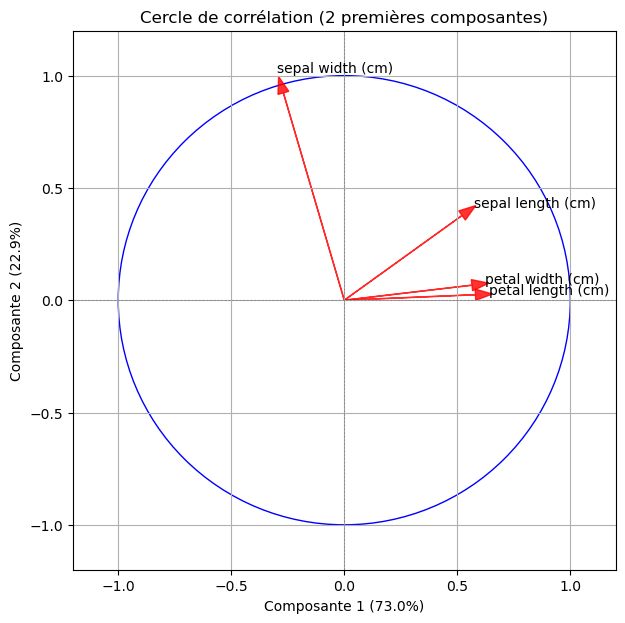

/tmp/ipykernel_23882/1689829382.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, cmap='viridis')


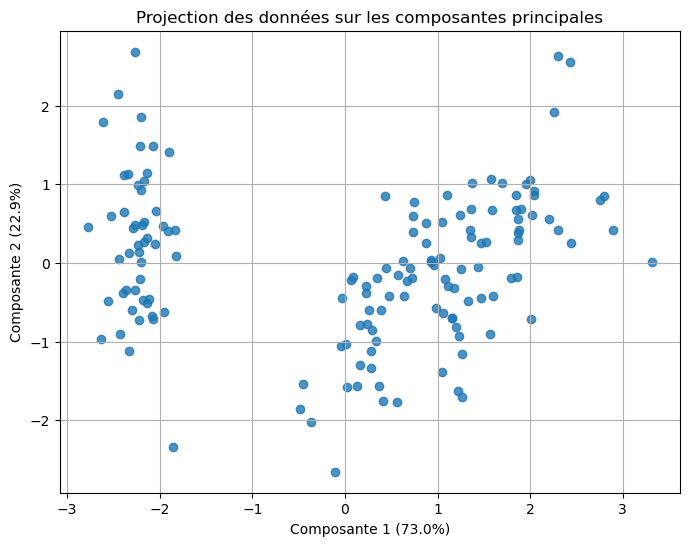

In [54]:

# # 1. Chargement des données simulées (ou un dataset réel comme iris)
# df = pd.DataFrame({
#     "Var1": [2.5, 0.5, 2.2, 1.9, 3.1],
#     "Var2": [2.4, 0.7, 2.9, 2.2, 3.0],
#     "Var3": [3.5, 2.4, 3.3, 3.8, 4.0],
#     "Var4": [4.2, 1.5, 4.8, 2.2, 5.1],
# })

# 2. Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Application de l'ACP
pca = PCA(n_components=2)  # Réduction à 2 composantes
X_pca = pca.fit_transform(X_scaled)

# 4. Récupération des informations importantes
explained_variance = pca.explained_variance_ratio_  # Variance expliquée
components = pca.components_  # Axes principaux (vecteurs propres)

print("Variance expliquée : ", explained_variance)
print("Axes principaux :\n", components)

# 5. Visualisation du cercle de corrélation
def plot_correlation_circle(pca_components, features, explained_variance):
    plt.figure(figsize=(7, 7))
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

    # Cercle unitaire
    circle = plt.Circle((0, 0), 1, color='blue', fill=False)
    plt.gca().add_artist(circle)

    # Affichage des vecteurs
    for i, (x, y) in enumerate(zip(pca_components[0], pca_components[1])):
        plt.arrow(0, 0, x, y, color='red', alpha=0.8, head_width=0.05)
        plt.text(x * 1.1, y * 1.1, features[i], color='black')

    plt.title("Cercle de corrélation (2 premières composantes)")
    plt.xlabel(f"Composante 1 ({explained_variance[0]:.1%})")
    plt.ylabel(f"Composante 2 ({explained_variance[1]:.1%})")
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.grid()
    plt.show()


# Noms des variables
features = df.columns

# Appel de la fonction pour tracer le cercle de corrélation
plot_correlation_circle(components, features, explained_variance)

# 6. Projection des données sur les nouvelles composantes (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, cmap='viridis')
plt.title('Projection des données sur les composantes principales')
plt.xlabel(f"Composante 1 ({explained_variance[0]:.1%})")
plt.ylabel(f"Composante 2 ({explained_variance[1]:.1%})")
plt.grid()
plt.show()
